### <span style = 'color:grey'> Introduction: </span> Glasses detection plays an important role in face recognition and soft biometrices for person identification. However, automatic glasses detection is still a challenging problem under real application scenarios, because face variations, light conditions, and self-occlusion, have significant influence on its performance.

### <span style = 'color:red'>Objective</span>: Create a deep learning algorithm that can diffrentiate the people with eye glasses and without eye glasses on facial analysis 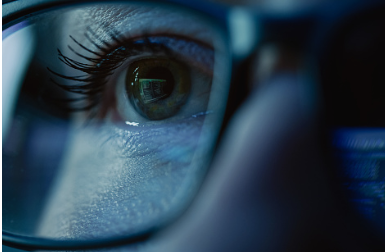 






#### For dataset <a href="https://drive.google.com/drive/folders/11MajaKB5T0cHRx5aXo9F72Un7hHqTCpA" title="Glasses dataset">   Click here</a>


**Outcomes of the Project**
- There are two diffrent classes in the dataset, Try to display the images of each class.
- Use CNN for model building.
- Explain the parameters in CNN and how it will alter the model building.
- Draw inference on Image augmentation.
- Draw inference on epochs and batch sizes.
- CNN model should be able to classify the people with and without glasses.

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

In [2]:

img_height, img_width = 250, 250
batch_size = 5
epochs = 30

# Directory paths
current_path = os.getcwd()
base_dir = current_path+"C:\\Users\\Sehjal\\Downloads\\glasses_3_3_1"
glass_dir = os.path.join(base_dir, 'glass')
no_glass_dir = os.path.join(base_dir, 'no_glass')

In [3]:

def display_images(image_paths, title):
    plt.figure(figsize=(10, 60))
    for i, image_path in enumerate(image_paths):
        img = mpimg.imread(image_path)
        plt.subplot(20, 3, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(title)
    plt.show()

In [4]:

glass_samples = [os.path.join(glass_dir, img) for img in os.listdir(glass_dir)[:6]]

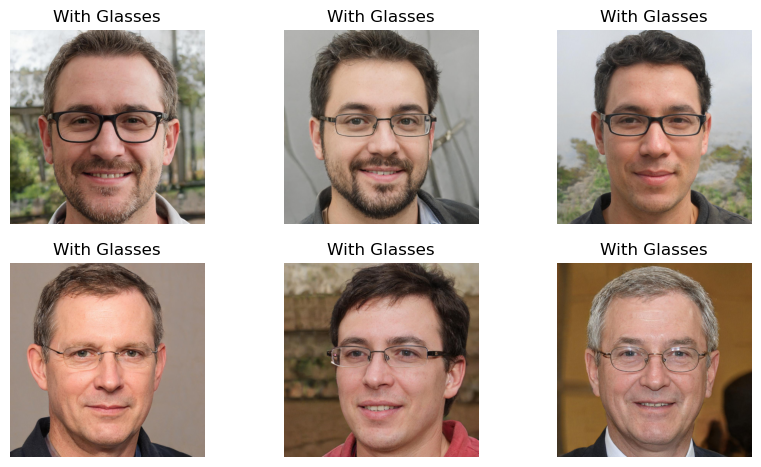

In [5]:
display_images(glass_samples, 'With Glasses')

In [6]:

no_glass_samples = [os.path.join(no_glass_dir, img) for img in os.listdir(no_glass_dir)[:6]]

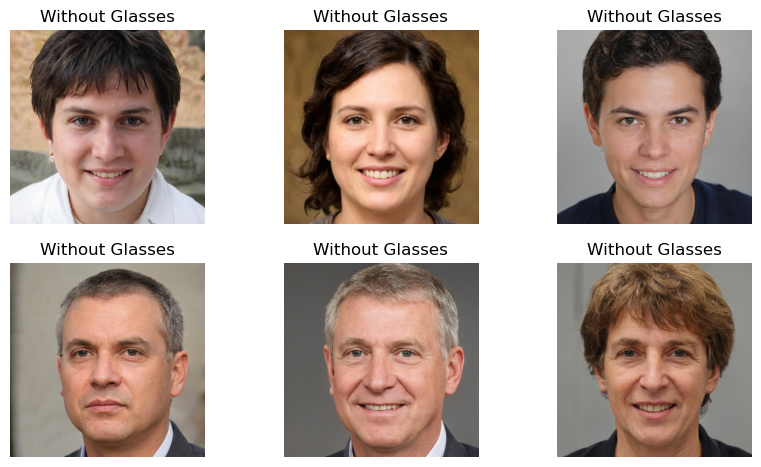

In [7]:
display_images(no_glass_samples, 'Without Glasses')

IMAGE AUGMENTATION

In [8]:

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  
)

In [9]:

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)
print(f'Train Generator: {train_generator}')


Found 69 images belonging to 3 classes.
Train Generator: <keras.src.legacy.preprocessing.image.DirectoryIterator object at 0x0000027484561D90>


In [10]:
validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

print(f'Validation Generator: {validation_generator}')

Found 17 images belonging to 3 classes.
Validation Generator: <keras.src.legacy.preprocessing.image.DirectoryIterator object at 0x0000027485F09C50>


CNN MODEL

In [11]:

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:

model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

MODEL SUMMARY

In [13]:

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 248, 248, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 124, 124, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 122, 122, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 61, 61, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 238144)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      30,482,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,502,081 (116.36 MB)

 Trainable params: 30,502,081 (116.36 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=12
)

Epoch 1/12


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 484ms/step - accuracy: 0.7100 - loss: -2.8175 - val_accuracy: 0.6667 - val_loss: -17.0581
Epoch 2/12
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2000 - loss: -39.8400 - val_accuracy: 1.0000 - val_loss: 1.9374e-23
Epoch 3/12


C:\ProgramData\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 448ms/step - accuracy: 0.6474 - loss: -26.9993 - val_accuracy: 0.8000 - val_loss: -39.2351
Epoch 4/12
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: -177.2128
Epoch 5/12
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 448ms/step - accuracy: 0.6332 - loss: -81.9873 - val_accuracy: 0.6667 - val_loss: -157.0709
Epoch 6/12
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8000 - loss: -63.9566 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/12
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 440ms/step - accuracy: 0.7080 - loss: -168.0331 - val_accuracy: 0.7333 - val_loss: -286.7552
Epoch 8/12
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6000 - loss: -476.9642 - val_accuracy: 0.5000 - val_loss: -512.0663
Epoch 9/12
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 440ms/step - accuracy: 0.7802 - loss: -275.1060 - val_accuracy: 0.6667 - val_loss: -722.9190
Epoch 10/12
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6000 - loss:

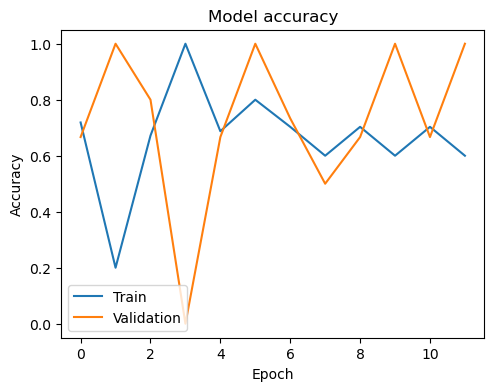

In [16]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower left')

In [18]:

loss, accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.6333 - loss: -1623.5867
Validation Accuracy: 66.67%


In [19]:

x_val_batch, y_val_batch = next(validation_generator)
predictions = model.predict(x_val_batch)
predictions = (predictions > 0.5).astype(int).flatten()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


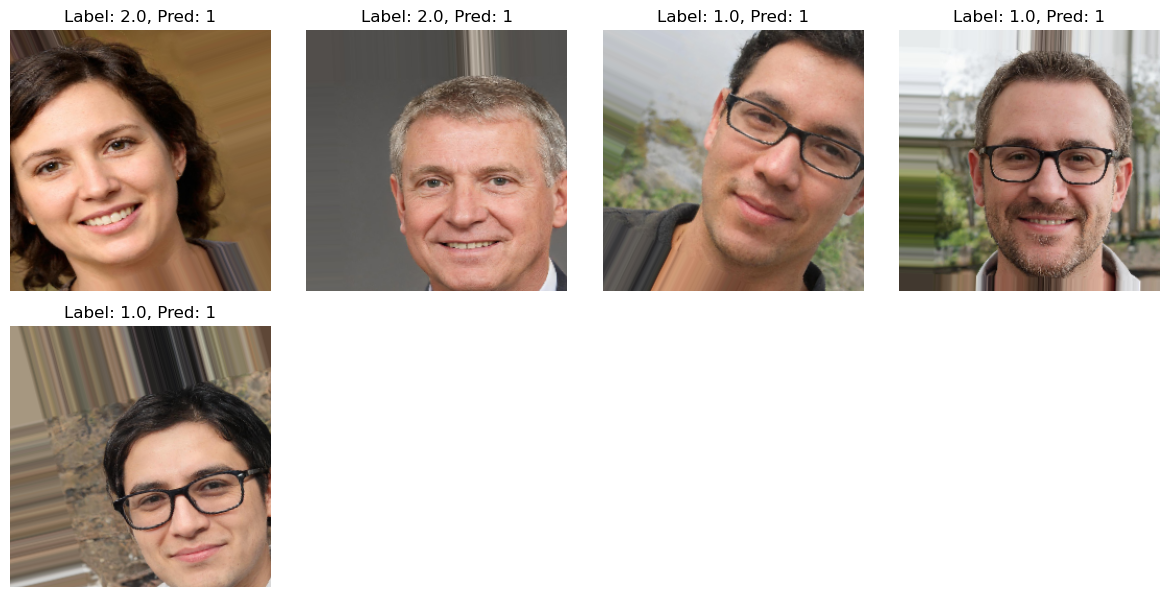

In [20]:
plt.figure(figsize=(12, 12))
for i in range(len(x_val_batch)):
    plt.subplot(4, 4, i + 1)
    plt.imshow(x_val_batch[i])
    plt.title(f'Label: {y_val_batch[i]}, Pred: {predictions[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()